# Preprocessing code of Nicole


### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

### Reading Images

In [6]:
img1_raw = "raw_data/NigranBee__ocean__2022-11-29_09_01_15__164.png"
img2_raw = "raw_data/NigranBee__ocean__2022-11-28_17_38_43__156.png"
img3_raw = "raw_data/NigranBee__ocean__2022-11-28_17_38_23__155.png"

img5_raw = "raw_data/NigranBee__ocean__2022-11-28_17_36_42__150.png"
img6_raw = "raw_data/NigranBee__ocean__2022-11-28_17_33_01__148.png"

hawai1_raw = "raw_data/HawaiBee__ocean__2022-11-28_17_07_56__101.png"
hawai2_raw = "raw_data/HawaiBee__ocean__2022-11-28_16_54_35__102.png"
hawai3_raw = "raw_data/HawaiBee__ocean__2022-11-28_12_03_58__143.png"

zar1_raw = "raw_data/ZarautzBee__ocean__2022-11-28_10_33_11__103.png"
zar2_raw = "raw_data/ZarautzBee__ocean__2022-11-28_10_37_38__113.png"


In [69]:
img1 = cv2.imread(img1_raw)
img2 = cv2.imread(img2_raw)
img3 = cv2.imread(img3_raw)
img5 = cv2.imread(img5_raw)
img6 = cv2.imread(img6_raw)




In [70]:
img1.shape

(582, 1034, 3)

### Cropping Images

In [71]:
def crop_image(image,y,h,x,w):
    return image[y:h, x:w]   
    
def resize_image(image , image_width = 400 , image_height = 400):
    #feel free to modify interpolation
    return cv2.resize(image , (image_width , image_height) , interpolation = cv2.INTER_AREA)

def transform_channels(image):
    return cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

def make_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [72]:
img1.shape

(582, 1034, 3)

In [73]:
resized_img = resize_image(img1)
resized_img.shape

(400, 400, 3)

In [74]:
transformed_img = transform_channels(resized_img)
transformed_img.shape


(400, 400, 3)

In [75]:
x = 0
w = 1034
y = 60
h = 500

In [76]:
cropped_image_1 = crop_image(img1,y,h,x,w)

In [77]:
cropped_image_2 = crop_image(img2,y,h,x,w)

In [78]:
cropped_image_3 = crop_image(img3,y,h,x,w)

In [79]:
cropped_image_1.shape

(440, 1034, 3)

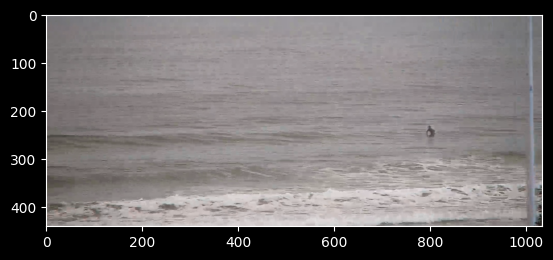

In [80]:
plt.imshow(cropped_image_1, cmap = "gray")


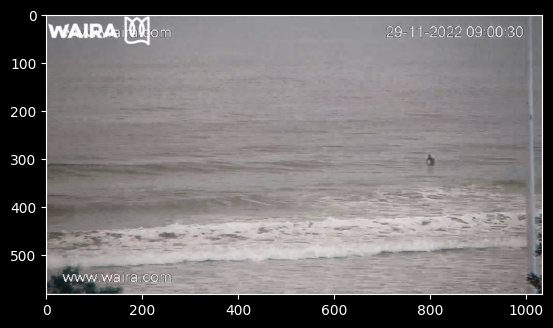

In [81]:
plt.imshow(img1,cmap = "gray")


### Masking Blue Color

In [82]:
### Thresholding on Blue Color
img_hsv=cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0 + mask1

# set my output img to zero everywhere except my mask
output_img = cropped_image_1.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0

In [83]:
#lower_blue = np.array([100, 100, 100])
#upper_blue = np.array([255, 255, 255])
#mask1 = cv2.inRange( (cropped_image_1*255).astype(np.int32), lower_blue, upper_blue)

(-0.5, 1033.5, 439.5, -0.5)

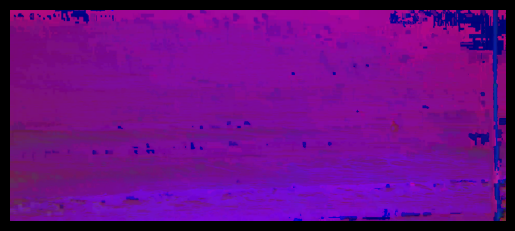

In [84]:
plt.imshow(img_hsv , cmap = "gray")
plt.axis("off")

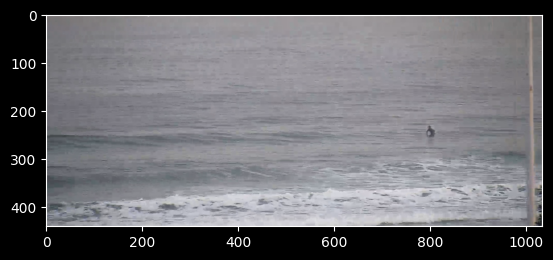

In [23]:
plt.imshow(cropped_image_1)

### Thresholding


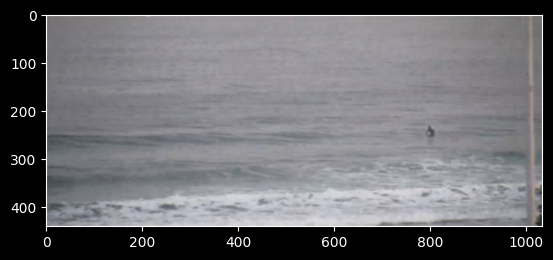

In [24]:
blurred = cv2.GaussianBlur(cropped_image_1, (7, 7), 0)
plt.imshow(blurred , cmap = "gray")

#(T, thresh) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY)  #cv2.THRESH_OTSU


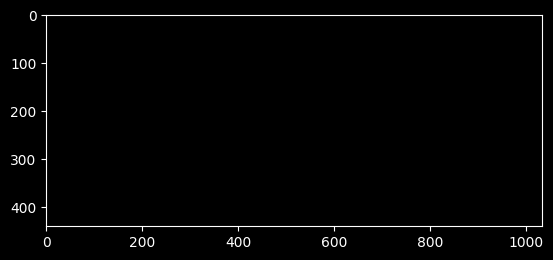

In [28]:

(T, thresh) = cv2.threshold( cropped_image_1, 0.5, 1,
                            cv2.THRESH_BINARY_INV)  #cv2.THRESH_OTSU
plt.imshow(thresh , cmap = "gray")

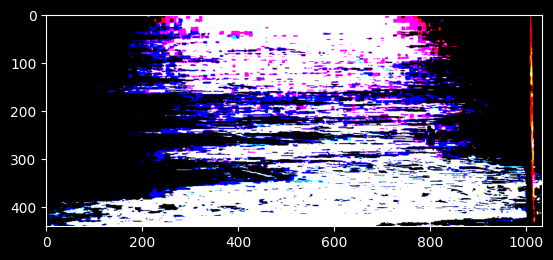

In [68]:
(T, thresh2) = cv2.threshold(cropped_image_1, 0.580, 1, cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap="gray")

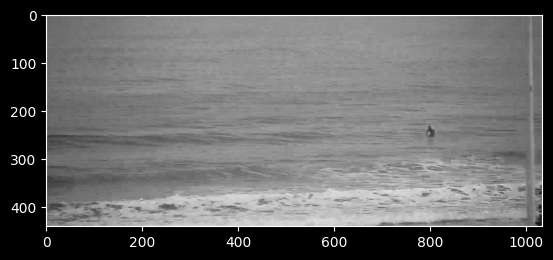

In [30]:
gray_img = cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap="gray")

In [31]:
gray_img = (gray_img*255).astype(np.uint8)


In [54]:
edges = cv2.Canny(gray_img, 90,90)


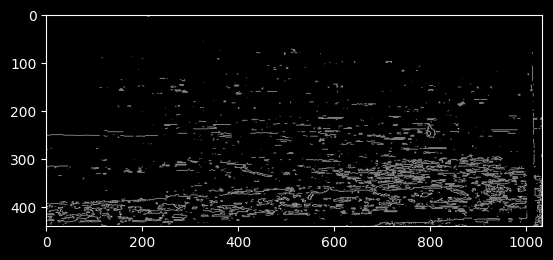

In [55]:
plt.imshow(edges , cmap = "gray")


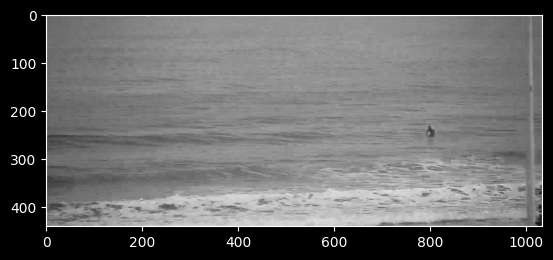

In [133]:
gray_img = cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap="gray")
